In [1]:
from IPython.display import Image

----------------
## PANDAS - Indexing and selecting data
------------
The `axis labeling` information in pandas objects serves many purposes:

- Identifies data (i.e. provides metadata) using known indicators, important for analysis, visualization, and interactive console display.

- Enables automatic and explicit data alignment.

- Allows intuitive getting and setting of subsets of the data set.

In [2]:
import numpy as np
import pandas as pd

- pandas now supports 3 types of multi-axis indexing.

    - `.loc` is primarily label based, but may also be used with a boolean array. .loc will raise KeyError when the items are not found. Allowed inputs are:

        - A single label, e.g. 5 or 'a' (Note that 5 is interpreted as a label of the index. This use is not an integer position along the index.).

        - A list or array of labels ['a', 'b', 'c'].

        - A slice object with labels 'a':'f' (Note that contrary to usual Python slices, both the start and the stop are included, when present in the index! 

        - A boolean array (any NA values will be treated as False).

    - `.iloc` is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. 
        - `.iloc` will raise IndexError if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing. (this conforms with Python/NumPy slice semantics). 
        - Allowed inputs are:

            - An integer e.g. 5.
            - A list or array of integers [4, 3, 0].
            - A slice object with ints 1:7.
            - A boolean array (any NA values will be treated as False).

    - `.loc`, `.iloc`, and also `[]` indexing can accept a callable as indexer. 

##### indexing with []

|Object Type | Selection | Return Value Type |
|------------| --------- | ----------------- |
|Series      | series[label] | scalar value  |
|DataFrame   | frame[colname]| Series corresponding to colname|

In [3]:
dates = pd.date_range('1/1/2000', periods=8)

In [4]:
df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,1.446281,-2.090100,0.668502,0.055731
2000-01-02,-1.468345,0.944814,-0.743764,1.700233
2000-01-03,0.801965,-0.898312,-0.355586,-0.374232
2000-01-04,-0.532949,0.393661,-0.181407,-0.065507
2000-01-05,1.258159,1.472820,-1.857532,0.056362
2000-01-06,0.292524,0.279178,-0.077153,-0.060602
2000-01-07,-0.428393,-1.291168,0.397624,0.477840
2000-01-08,0.936736,-1.487344,-0.513470,0.924955


In [6]:
s = df['A']
s

2000-01-01    1.446281
2000-01-02   -1.468345
2000-01-03    0.801965
2000-01-04   -0.532949
2000-01-05    1.258159
2000-01-06    0.292524
2000-01-07   -0.428393
2000-01-08    0.936736
Freq: D, Name: A, dtype: float64

In [7]:
s[5]

0.2925235915630915

In [8]:
df[['A', 'B']]

,A,B
2000-01-01,1.446281,-2.090100
2000-01-02,-1.468345,0.944814
2000-01-03,0.801965,-0.898312
2000-01-04,-0.532949,0.393661
2000-01-05,1.258159,1.472820
2000-01-06,0.292524,0.279178
2000-01-07,-0.428393,-1.291168
2000-01-08,0.936736,-1.487344


##### loc vs iloc

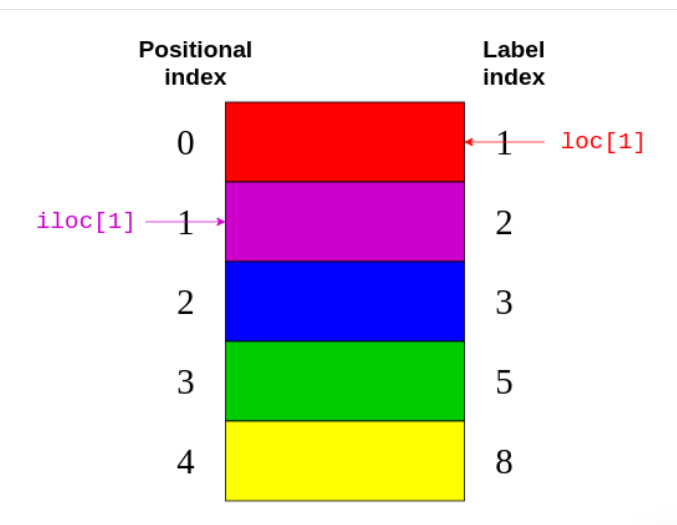

In [13]:
Image(filename = r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\pandas-loc.PNG', width=400)

In [9]:
colors = pd.Series(
...     ["red", "purple", "blue", "green", "yellow"],
...     index=[10, 20, 30, 50, 80]
... )
colors

10       red
20    purple
30      blue
50     green
80    yellow
dtype: object

In [10]:
colors[10]

'red'

- For a positional index, colors[1] is "purple". 
- For label index, then colors[1] is referring to "red".

two data access methods:

- loc refers to the label index.
- .iloc refers to the positional index.

In [11]:
colors.loc[10]

'red'

In [12]:
colors.iloc[0]

'red'

In [12]:
colors

10       red
20    purple
30      blue
50     green
80    yellow
dtype: object

In [13]:
colors.iloc[1:3]

20    purple
30      blue
dtype: object

In [14]:
colors.loc[3:8]

Series([], dtype: object)

 return all elements with a label index between 3 and 8

.loc includes the closing element:

In [15]:
colors.iloc[-2]

'green'

#### Example ...

In [22]:
revenues = pd.Series([5555, 7000, 1980])
revenues

0    5555
1    7000
2    1980
dtype: int64

In [23]:
revenues.index, revenues.values

(RangeIndex(start=0, stop=3, step=1), array([5555, 7000, 1980], dtype=int64))

In [24]:
city_revenues = pd.Series(
...     [4200, 8000, 6500],
...     index=["Amsterdam", "Toronto", "Tokyo"]
... )
city_revenues

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

In [25]:
city_employee_count = pd.Series({"Amsterdam": 5, "Tokyo": 8})
city_employee_count

Amsterdam    5
Tokyo        8
dtype: int64

In [26]:
city_employee_count.keys()

Index(['Amsterdam', 'Tokyo'], dtype='object')

In [27]:
"Tokyo" in city_employee_count

True

In [28]:
city_data = pd.DataFrame({
...     "revenue": city_revenues,
...     "employee_count": city_employee_count
... })
city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN


In [29]:
city_data.index

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [30]:
city_data.axes

[Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object'),
 Index(['revenue', 'employee_count'], dtype='object')]

In [31]:
city_data.axes[0], city_data.axes[1]

(Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object'),
 Index(['revenue', 'employee_count'], dtype='object'))

In [32]:
city_data.keys()

Index(['revenue', 'employee_count'], dtype='object')

In [33]:
city_revenues

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

In [34]:
city_revenues["Toronto"] # label 

8000

In [35]:
city_revenues[2] # positional indices:

6500

In [36]:
city_revenues["Toronto":]

Toronto    8000
Tokyo      6500
dtype: int64

In [37]:
city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN


In [38]:
city_data["revenue"]

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

In [39]:
type(city_data["revenue"])

pandas.core.series.Series

In [40]:
city_data.loc["Amsterdam"]

revenue           4200.0
employee_count       5.0
Name: Amsterdam, dtype: float64

In [41]:
city_data.loc["Tokyo": "Toronto"]

,revenue,employee_count
Tokyo,6500,8.0
Toronto,8000,NaN


In [42]:
city_data.iloc[1]

revenue           6500.0
employee_count       8.0
Name: Tokyo, dtype: float64

In [43]:
city_data.loc["Amsterdam": "Tokyo", "revenue"]

Amsterdam    4200
Tokyo        6500
Name: revenue, dtype: int64

The first parameter, "Amsterdam" : "Tokyo," says to select all rows between those two labels. The second parameter comes after the comma and says to select the "revenue" column.

##### More examples ...

In [44]:
s1 = pd.Series(np.random.randn(6), index=list('abcdef'))
s1

a    1.293008
b    1.649531
c   -0.060200
d    1.053482
e   -1.580323
f    1.007462
dtype: float64

In [45]:
s1.loc['c':]

c   -0.060200
d    1.053482
e   -1.580323
f    1.007462
dtype: float64

In [46]:
s1.loc['b']

1.6495312378794416

In [47]:
s1.loc['c':'e']

c   -0.060200
d    1.053482
e   -1.580323
dtype: float64

With a DataFrame:

In [48]:
df1 = pd.DataFrame(np.random.randn(6, 4),
   ....:                    index=list('abcdef'),
   ....:                    columns=list('ABCD'))
df1

,A,B,C,D
a,1.411887,0.208728,0.338541,-0.694430
b,0.629717,0.796596,1.350612,-0.808746
c,0.833178,-1.633108,1.335575,-0.646418
d,1.350303,-1.186149,-2.442059,-0.014175
e,0.597051,1.118014,-1.192305,-1.255856
f,-0.457657,-0.434131,-0.505599,0.866375


In [49]:
df1.loc[['a', 'b', 'd'], :]

,A,B,C,D
a,1.411887,0.208728,0.338541,-0.694430
b,0.629717,0.796596,1.350612,-0.808746
d,1.350303,-1.186149,-2.442059,-0.014175


Accessing via label slices:

In [50]:
df1.loc['d':, 'A':'C']

,A,B,C
d,1.350303,-1.186149,-2.442059
e,0.597051,1.118014,-1.192305
f,-0.457657,-0.434131,-0.505599


In [51]:
df1.loc['a']

A    1.411887
B    0.208728
C    0.338541
D   -0.694430
Name: a, dtype: float64

For getting values with a boolean array:

In [52]:
df1.loc['a'] > 0

A     True
B     True
C     True
D    False
Name: a, dtype: bool

In [53]:
df1.loc[:, df1.loc['a'] > 0]

,A,B,C
a,1.411887,0.208728,0.338541
b,0.629717,0.796596,1.350612
c,0.833178,-1.633108,1.335575
d,1.350303,-1.186149,-2.442059
e,0.597051,1.118014,-1.192305
f,-0.457657,-0.434131,-0.505599


##### Slicing with labels

When using `.loc` with slices, if both the `start` and the `stop` labels are present in the index, then elements located between the two (including them) are returned:

In [54]:
s = pd.Series(list('abcde'), index=[0, 3, 2, 5, 4])
s

0    a
3    b
2    c
5    d
4    e
dtype: object

In [55]:
s.loc[3:5]

3    b
2    c
5    d
dtype: object

##### Selecting random samples
A random selection of rows or columns from a Series or DataFrame with the sample() method. The method will sample rows by default, and accepts a specific number of rows/columns to return, or a fraction of rows.

In [56]:
s = pd.Series([0, 1, 2, 3, 4, 5])

In [57]:
s.sample()

3    3
dtype: int64

In [58]:
s.sample(n=3)

0    0
1    1
4    4
dtype: int64

In [59]:
s.sample(frac=0.5)

1    1
5    5
4    4
dtype: int64

By default, `sample` will return `each row at most once`, but one can also sample with `replacement` using the replace option:

In [60]:
s = pd.Series([0, 1, 2, 3, 4, 5])

In [62]:
# Without replacement (default):
s.sample(n=3, replace=False)

2    2
4    4
0    0
dtype: int64

In [65]:
# With replacement:
s.sample(n=3, replace=True)

3    3
5    5
3    3
dtype: int64

##### Boolean indexing

- Another common operation is the use of `boolean vectors` to filter the data. 

- The operators are: `|` for `or`, `&` for `and`, and `~` for `not`. 

- These must be grouped by using parentheses, since by default Python will evaluate an expression such as `df['A'] > 2 & df['B'] < 3` as `df['A'] > (2 & df['B']) < 3`, while the desired evaluation order is (df['A'] > 2) & (df['B'] < 3).

- Using a boolean vector to index a Series works exactly as in a NumPy ndarray:

In [16]:
s = pd.Series(range(-3, 4))

In [17]:
s[s > 0]

4    1
5    2
6    3
dtype: int64

In [18]:
s[(s < -1) | (s > 0.5)]

0   -3
1   -2
4    1
5    2
6    3
dtype: int64

In [19]:
s[~(s < 0)]

3    0
4    1
5    2
6    3
dtype: int64